# Convergence Tests

In [1]:
using Plots, Measures, Printf
theme(:wong2)
using Interpolations
using LaTeXStrings
include("../Utils/misc-tsv.jl")

Main.MiscTSV

In [2]:
# Convergence Factor
factor(order) = (1 - (1/2.25)^order) / ((1/1.5)^order - (1/2.25)^order)

factor (generic function with 1 method)

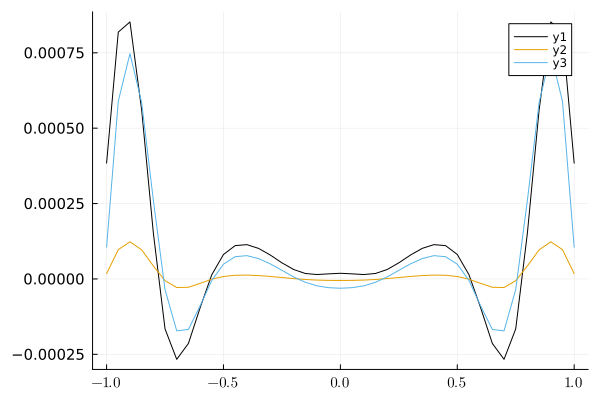

In [14]:
plts = []
let l=1, t=1.0, dirss,
    dirss = [
        [
            ("gaussian_96_r0000/gaussian_96/", "96"),
            #("gaussian_120_r0000/gaussian_120/", "120"),
            ("gaussian_144_r0000/gaussian_144/", "144"),
            #("gaussian_150_r0000/gaussian_150/", "150"),
            ("gaussian_216_r0000/gaussian_216/", "216"),
            #("gaussian_324_r0000/gaussian_324/", "324"),
        ],
    ]

    for (j, dirs) in enumerate(dirss)
        (dats, _) = MiscTSV.load_data_1d(dirs, t; parent_dir="../../data/ScalarWave/3levels-moreres",
                                                  prefix="testsubcyclingmc2-error",
                                                  level=l, ngh=0)

        # Interpolate
        itps = []
        for dat in dats
            push!(itps, linear_interpolation(dat[1], dat[2]))
        end

        x0 = -1.0:0.05:1.0
        f_low_high = itps[1].(x0) - itps[3].(x0)
        f_med_high = itps[2].(x0) - itps[3].(x0)
        
        plt = plot(titlefontsize=10, guidefontsize=10, tickfontsize=10, legendfontsize=8)
        xs = [-1.0, -0.5, 0.0, 0.5, 1.0]
        xticks!(plt, xs, [L"%$(n)" for n in xs])

        plt = plot!(x0, f_low_high)
        plt = plot!(x0, f_med_high)
        plt = plot!(x0, f_med_high * factor(4))

        display(plt)
    end
end